In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db = pd.read_csv("BankNote_Authentication.csv")

In [3]:
db.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
db.shape

(1372, 5)

In [5]:
db.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

# Exploratory data analysis

In [6]:
db.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### check and remove skewness from dataset by using feature transformation

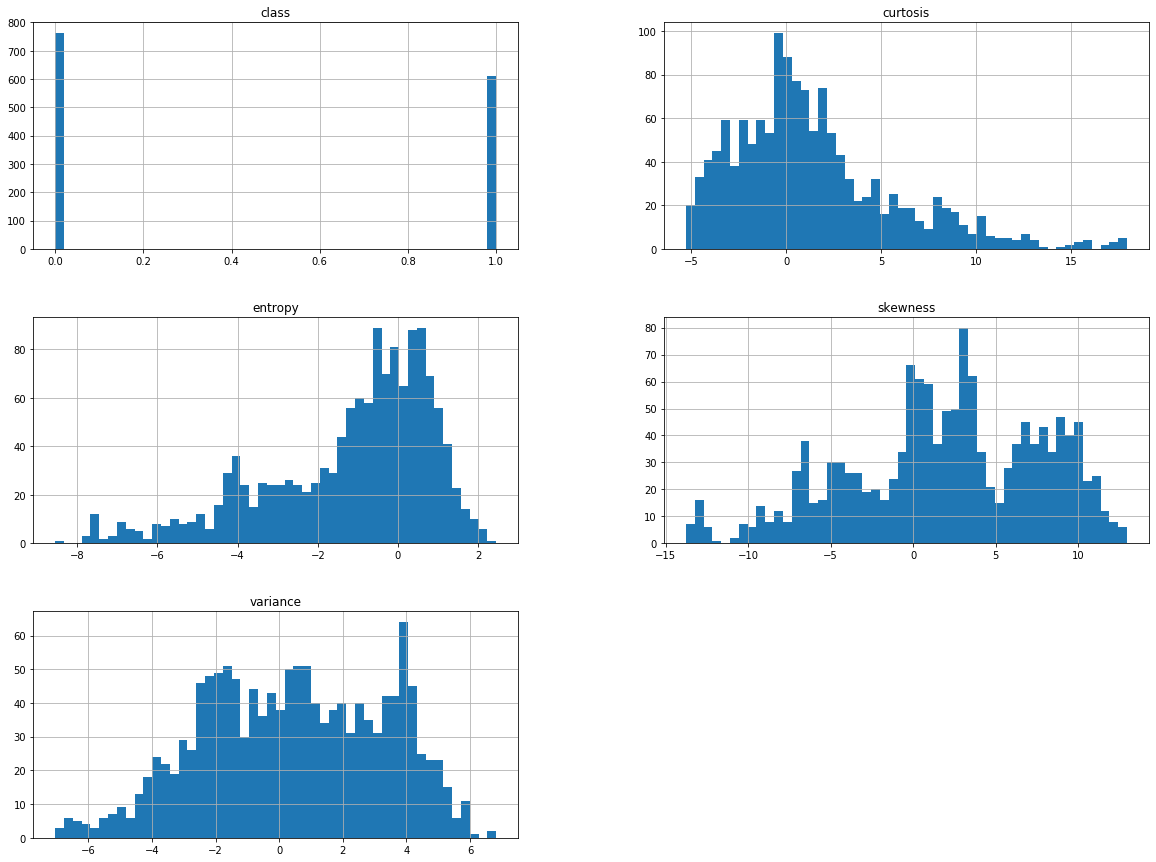

In [7]:
db.dropna().hist(bins=50,figsize=(20,15))
plt.show()

here,we can see that the 'curtosis', 'entropy'  are suffering from  skewness..

In [8]:
print('Skewness: %f' % db['curtosis'].skew())
print('Kurtsis: %f' % db['curtosis'].kurt())

Skewness: 1.088569
Kurtsis: 1.270476


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'sq_root-curtosis')

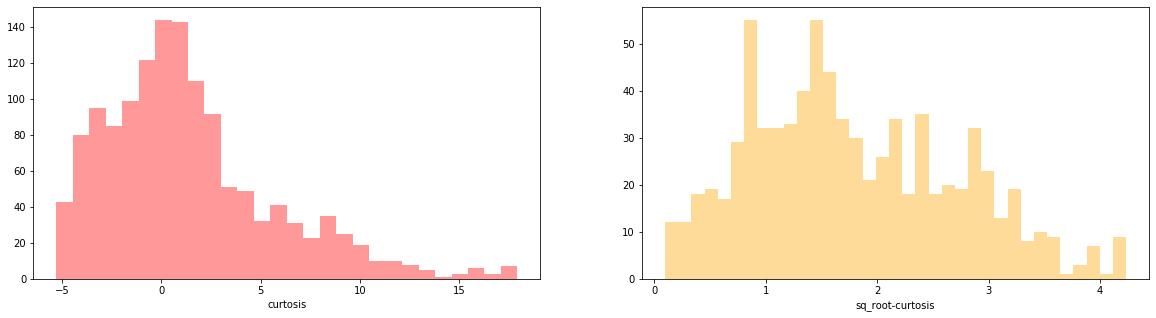

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.curtosis.dropna(), ax=ax[0], kde=False, color="red")
sns.distplot(np.sqrt(db.curtosis.dropna()), ax=ax[1], bins=35, color="orange", kde=False)
ax[1].set_xlabel("sq_root-curtosis")

In [10]:
print('Skewness: %f' % np.cbrt(db.curtosis.dropna()).skew())
print('Kurtsis: %f' % np.cbrt(db.curtosis.dropna()).kurt())

Skewness: -0.146210
Kurtsis: -1.586587


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


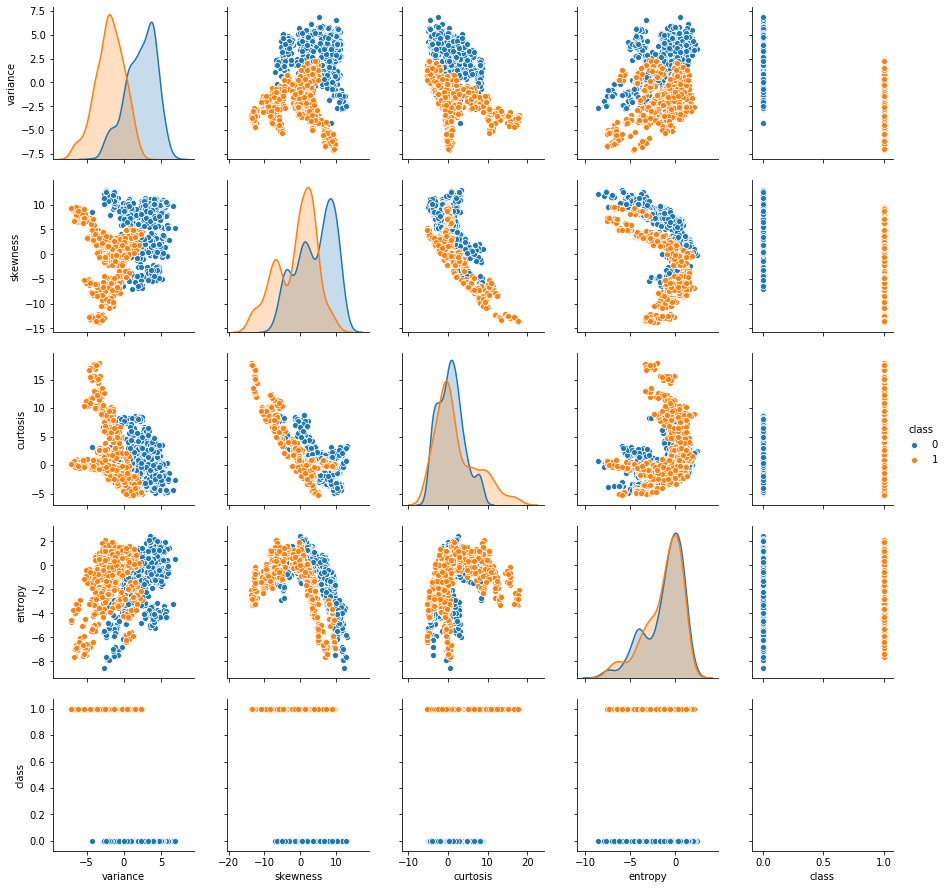

In [11]:
sns.pairplot(db, hue='class') 
plt.show()

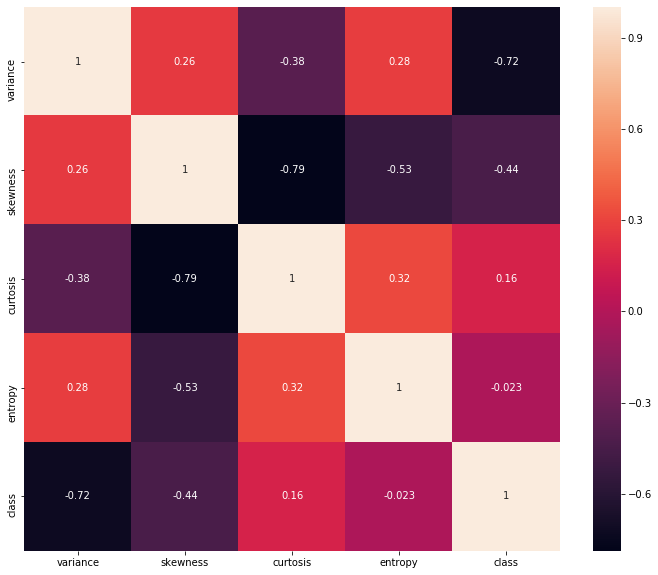

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(db.corr(),annot=True)

In [13]:
db.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


so we can see that the highest negative correlation between curtosis and skewness is -0.786.

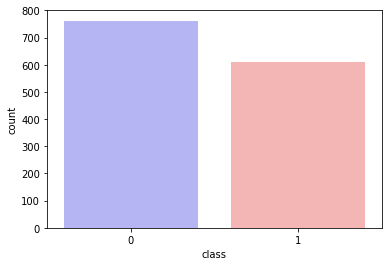

In [14]:
sns.countplot(x="class", data=db, palette="bwr")
plt.show()

In [15]:
count_0 = len(db[db['class'] == 0])
count_1 = len(db[db['class'] == 1])
print("Percentage of class Have 0 : {:.2f}%".format((count_0 / (len(db['class']))*100)))
print("Percentage of class Have 1: {:.2f}%".format((count_1 / (len(db['class']))*100)))

Percentage of class Have 0 : 55.54%
Percentage of class Have 1: 44.46%


# data preparation

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(db.drop('class',axis=1))
scale_features = scalar.transform(db.drop('class',axis = 1))

df_feat = pd.DataFrame(scale_features,columns = db.columns[:-1])
df_feat.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [17]:
X = df_feat
X['curtosis'] = np.cbrt(X.curtosis)
y = db['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.25)


# model selection

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
# fit the model to the training data (learn the coefficients)
logreg.fit(X_train, y_train)
# make predictions on the testing set
y_pred = logreg.predict(X_test)
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9824923304770972


In [44]:
import math
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics.classification import confusion_matrix
from sklearn.metrics.classification import classification_report 

In [45]:
y_pred = logreg.predict(X_test)
print("Accuracy:")
print(accuracy_score(y_test, y_pred ))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred ))
print("Classification Report:")
print(classification_report(y_test, y_pred ))

Accuracy:
0.9475218658892128
Confusion Matrix:
[[178   5]
 [ 13 147]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       183
           1       0.97      0.92      0.94       160

    accuracy                           0.95       343
   macro avg       0.95      0.95      0.95       343
weighted avg       0.95      0.95      0.95       343



the accuracy from logistic regression is very good i.e:0.98.

## find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [46]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics.classification import accuracy_score
    from sklearn.metrics.classification import confusion_matrix
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True,scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, train_y_pred)
    test_conf = confusion_matrix (y_test, y_pred)
    train_conf = confusion_matrix (y_train, train_y_pred)
    
    class_report = classification_report(y_test,y_pred)
    y_pred_prob = grid.best_estimator_.predict_proba(X_test)[:,1]
    plt.hist(y_pred_prob,bins=10)
    plt.xlim(0,1)
    plt.xlabel("Predicted Proababilities")
    plt.ylabel("Frequency")
   
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_accuracy across ALL models:\n",
          train_acc)
                                    
    print("\n The test_accuracy across ALL models:\n",
          test_acc) 
    print("\n The train_confusion matrix across ALL models:\n",
          train_conf) 
    print("\n The test_confusion matrix across ALL models:\n",
          test_conf) 
    
    print("\n classification report across ALL models:\n",
          class_report) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

 The best score across ALL searched params:
 0.9922490933459477

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

 The train_accuracy across ALL models:
 1.0

 The test_accuracy across ALL models:
 0.9941690962099126

 The train_confusion matrix across ALL models:
 [[579   0]
 [  0

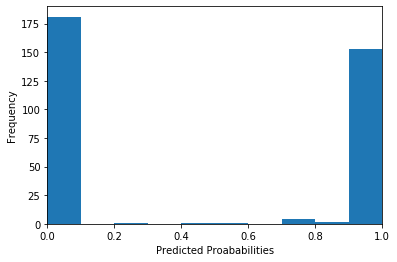

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.9955751559757519

 The best parameters across ALL searched params:
 {'learning_rate': 

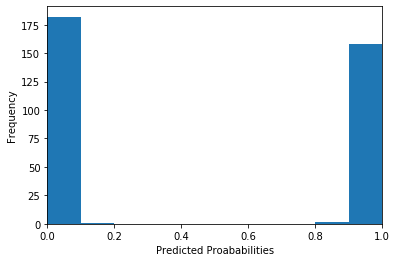

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.991179552155162

 The best parameters across ALL searched params:
 {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 3}

 The train_accuracy across ALL models:
 1.0

 The test_accuracy across ALL models:
 0.9912536443148688

 The

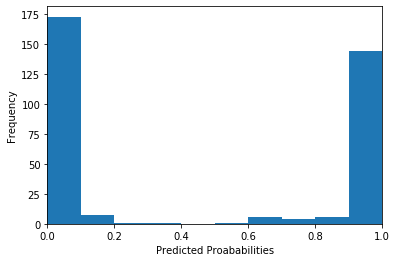

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 The best score across ALL searched params:
 0.9933823242758567

 The best parameters across ALL searched params:
 {'C': 10, 'kernel': 'rbf'}

 The train_accuracy across ALL models:
 0.9970845481049563

 The test_accuracy across ALL models:
 0.9941690962099126

 The train_confusion matrix across ALL models:
 [[576   3]
 [  0 450]]

 The test_confusion matrix across ALL models:
 [[181   2]
 [  0 160]]

 classification report across ALL models:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       183
           1       0.99    

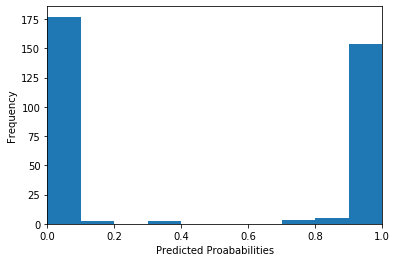

None



In [47]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
alg = [XGBClassifier(),GradientBoostingClassifier(), RandomForestClassifier(),SVC(probability=True)]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              { 'max_depth'    : [4,6,8],
                  'min_samples_split' : [2,3,4],
                  'max_features'    : ['auto','sqrt','log2']},
              
              {'kernel':['linear', 'rbf'], 
                'C':[1, 10]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

we can see that the GradientBoosting model has best score and their actual and predicted accuracy are nearby same as campare to other models

### bar plot of features importances

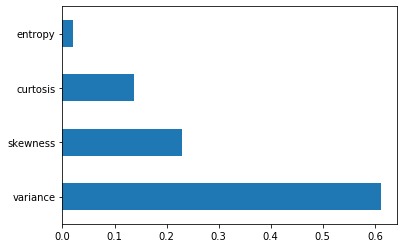

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

#### from this graph we can see that the most important feature for this model is 'variance'

## save model

In [20]:
import pickle

In [21]:
filename='BankNote_GradientBoostingClassifier_model.sav'

In [22]:
pickle.dump(model, open(filename, 'wb'))

In [23]:
load_lr_model =pickle.load(open(filename, 'rb'))